# S2Raw

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mmcv
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS
from mmdet.apis import init_detector, inference_detector

# Show the results
from mmcv.transforms import LoadImageFromFile, Compose, Resize
import cv2

def draw_bounding_boxes(image, bounding_boxes, scores=None, score_threshold=0.05, backend_args=None, savepath=None):
    # Create figure and axes
    fig, ax = plt.subplots(1, **backend_args)

    # Display the image
    ax.imshow(image)

    # Add bounding boxes to the image
    for i, bbox in enumerate(bounding_boxes):
        if scores is not None and scores[i] < score_threshold:
            continue
        
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height,
                                 linewidth=2, edgecolor='r', facecolor='none')

        # Add the rectangle to the axes
        ax.add_patch(rect)
        ax.axis(False)
        # Add the score as text
        if scores is not None:
            score = scores[i]
            ax.text(x_max+5, y_max+5, f'Score: {score:.2f}',
                    color='white', fontsize=8, bbox=dict(facecolor='r', alpha=0.7))
    
    if savepath is not None:
        fig.savefig(savepath)
    # Show the image with bounding boxes
    plt.show()
    plt.close(fig)
    

# define dataloader 
loader = LoadImageFromFile(to_float32=False, color_type='color', imdecode_backend='tifffile', backend_args=None)

# Specify the path to model config and checkpoint file
config_file = '/home/roberto/PythonProjects/S2RAWVessel/mmdetection/configs/vfnet/vfnet_r18_fpn_1x_vessel.py'
checkpoint_file = '/home/roberto/PythonProjects/S2RAWVessel/checkpoints/vfnet_r18_fpn_1x_vessel/20230518_152156_0.0005/epoch_239.pth'

# Build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Init visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# test_set
imgs=[{"height":1667,"width":2590,"id":1,"file_name":"day1_g_18_coreg.tif"},{"height":1676,"width":2588,"id":2,"file_name":"day1_g_26_coreg.tif"},{"height":1656,"width":2582,"id":3,"file_name":"day1_g_29_coreg.tif"},{"height":1676,"width":2590,"id":4,"file_name":"day1_g_34_coreg.tif"},{"height":1656,"width":2582,"id":5,"file_name":"day1_g_35_coreg.tif"},{"height":1676,"width":2590,"id":6,"file_name":"day1_g_40_coreg.tif"},{"height":1672,"width":2588,"id":7,"file_name":"day1_g_7_coreg.tif"},{"height":1671,"width":2587,"id":8,"file_name":"day2_g_16_coreg.tif"},{"height":1671,"width":2588,"id":9,"file_name":"day2_g_19_coreg.tif"},{"height":1670,"width":2590,"id":10,"file_name":"day2_g_20_coreg.tif"},{"height":1671,"width":2587,"id":11,"file_name":"day2_g_22_coreg.tif"},{"height":1682,"width":2590,"id":12,"file_name":"day2_g_24_coreg.tif"},{"height":1670,"width":2590,"id":13,"file_name":"day2_g_38_coreg.tif"},{"height":1668,"width":2592,"id":14,"file_name":"day3_g_30_coreg.tif"},{"height":1666,"width":2588,"id":15,"file_name":"day3_g_5_coreg.tif"},{"height":1665,"width":2584,"id":16,"file_name":"day4_g_48_coreg.tif"},{"height":1654,"width":2587,"id":17,"file_name":"day4_g_58_coreg.tif"},{"height":1654,"width":2587,"id":18,"file_name":"day4_g_63_coreg.tif"},{"height":1654,"width":2587,"id":19,"file_name":"day4_g_76_coreg.tif"},{"height":1669,"width":2592,"id":20,"file_name":"day5_g_1_coreg.tif"},{"height":1669,"width":2592,"id":21,"file_name":"day5_g_43_coreg.tif"},{"height":1676,"width":2588,"id":22,"file_name":"day5_g_4_coreg.tif"},{"height":1666,"width":2588,"id":23,"file_name":"day6_g_16_coreg.tif"},{"height":1665,"width":2584,"id":24,"file_name":"day6_g_24_coreg.tif"},{"height":1666,"width":2591,"id":25,"file_name":"day6_g_25_coreg.tif"},{"height":1654,"width":2587,"id":26,"file_name":"day7_g_14_coreg.tif"},{"height":1668,"width":2592,"id":27,"file_name":"day7_g_19_coreg.tif"},{"height":1666,"width":2591,"id":28,"file_name":"day7_g_24_coreg.tif"},{"height":1668,"width":2592,"id":29,"file_name":"day7_g_27_coreg.tif"},{"height":1668,"width":2592,"id":30,"file_name":"day7_g_35_coreg.tif"},{"height":1682,"width":2590,"id":31,"file_name":"day7_g_48_coreg.tif"},{"height":1654,"width":2587,"id":32,"file_name":"day7_g_8_coreg.tif"},{"height":1682,"width":2590,"id":33,"file_name":"day8_g_15_coreg.tif"},{"height":1671,"width":2588,"id":34,"file_name":"day8_g_16_coreg.tif"}]

base_path = '/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/vessels/imgs/'
outpath_base = '/home/roberto/PythonProjects/S2RAWVessel/output_results/'

file_names = [x['file_name'] for x in imgs]

In [ ]:
for idx in range(len(file_names)):
    # Test a single image and show the results
    img_path =base_path + file_names[idx]  # or img = mmcv.imread(img), which will only load it once

    load = loader(results={'img_path': img_path})
    img = load['img']
    result = inference_detector(model, img)
    img = mmcv.imconvert(img, 'bgr', 'rgb')
    print('Inference completed. Saving image...')
    
    predictions = list(result.pred_instances.all_items())
    
    keyholder={}
    for item in predictions:
        keyholder[item[0]]=item[1]
        
    scores, boxes, labels = keyholder['scores'], keyholder['bboxes'], keyholder['labels']
    scores = list(scores.detach().cpu().numpy())
    boxes = list(boxes.detach().cpu().numpy())

    new_name = file_names[idx].replace('.tif','.png')
    savepath = '/home/roberto/PythonProjects/S2RAWVessel/output_results/'+new_name
    # Draw the bounding boxes on the image
    draw_bounding_boxes(img, boxes, scores = scores, backend_args=dict(figsize=(40, 40), dpi=100), savepath=savepath, score_threshold=0.5)
    
        

# MS3

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mmcv
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS
from mmdet.apis import init_detector, inference_detector
import json 
from pathlib import Path

# Show the results
from mmcv.transforms import LoadImageFromFile, Compose, Resize
import cv2

def draw_bounding_boxes(image, bounding_boxes, scores=None, score_threshold=0.05, backend_args=None, savepath=None, gt_boxes=None):
    # Create figure and axes
    fig, ax = plt.subplots(1, **backend_args)

    # Display the image
    ax.imshow(image)

    # Add gt_boxes to the image
    if gt_boxes is not None:
        for i, bbox in enumerate(gt_boxes):
            x_min, y_min, width, height = bbox

            # Create a rectangle patch
            rect = patches.Rectangle((x_min, y_min), width, height,
                                    linewidth=2, edgecolor='w', facecolor='none')

            # Add the rectangle to the axes
            ax.add_patch(rect)
            ax.axis(False)

    # Add bounding boxes to the image
    for i, bbox in enumerate(bounding_boxes):
        if scores is not None and scores[i] < score_threshold:
            continue
        
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height,
                                 linewidth=2, edgecolor='y', facecolor='none')

        # Add the rectangle to the axes
        ax.add_patch(rect)
        ax.axis(False)
        # Add the score as text
        if scores is not None:
            score = scores[i]
            ax.text(x_max+5, y_max+5, f'Score: {score:.2f}',
                    color='white', fontsize=8, bbox=dict(facecolor='r', alpha=0.7))
    
    if savepath is not None:
        fig.savefig(savepath)
    # Show the image with bounding boxes
    plt.show()
    plt.close()
    

# define dataloader 
loader = LoadImageFromFile(to_float32=False, color_type='color', imdecode_backend='pillow', backend_args=None)

# Specify the path to model config and checkpoint file
config_file = '/home/roberto/PythonProjects/S2RAWVessel/checkpoints/MS3/vfnet_r50_fpn_1x_ms3/20230901_112855_LR_{0.0001}_BATCH_{6}/vfnet_r50_fpn_1x_ms3.py'
foldPath = Path('/home/roberto/PythonProjects/S2RAWVessel/checkpoints/MS3/vfnet_r50_fpn_1x_ms3/20230901_112855_LR_{0.0001}_BATCH_{6}/')
# list all file sin folderpath:
chkpts = list(foldPath.glob('*.pth'))
checkpoint_file = [x for x in chkpts if 'best' in x.name][0].as_posix()
print(checkpoint_file)
print('Loading checkpoint: ', checkpoint_file)
# Build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# Init visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# READ JSON FILE TEST:
json_file_path = '/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/MS3/annotations/test.json'
json_file = json.load(open(json_file_path))
imgs = json_file['images']

base_path = '/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/MS3/imgs/'
outpath_base = '/home/roberto/PythonProjects/S2RAWVessel/output_results/MS3/'

file_names = [x['file_name'] for x in imgs]

In [ ]:
def get_annotations_from_coco_json(coco_json_file, image_filename):
    annotations = []
    try:
        with open(coco_json_file, 'r') as f:
            coco_data = json.load(f)
    except FileNotFoundError:
        print(f"Could not find file {coco_json_file}")
        return annotations
    except json.JSONDecodeError:
        print(f"Could not decode JSON from {coco_json_file}")
        return annotations

    # Extract image ID corresponding to the given image filename
    image_id = None
    for img in coco_data.get('images', []):
        if img.get('file_name') == image_filename:
            image_id = img.get('id')
            break

    if image_id is None:
        print(f"No matching image found for filename {image_filename}")
        return annotations

    # Extract annotations for the image
    for annotation in coco_data.get('annotations', []):
        if annotation.get('image_id') == image_id:
            annotations.append(annotation)

    gt_boxes = [x['bbox'] for x in annotations]
    
    return annotations, gt_boxes

In [ ]:
import numpy as np

# take 4 random indexes between 0 and len(filenames)
idxs = np.random.choice(len(file_names), size=4, replace=False)
print('Selected indexes:', idxs)
for idx in idxs:
    # Test a single image and show the results
    img_path =base_path + file_names[idx]  # or img = mmcv.imread(img), which will only load it once
    annot, gt_boxes = get_annotations_from_coco_json(json_file_path, file_names[idx])

    load = loader(results={'img_path': img_path})
    img = load['img']
    result = inference_detector(model, img)
    img = mmcv.imconvert(img, 'bgr', 'rgb')
    print('Inference completed. Saving image...')
    
    predictions = list(result.pred_instances.all_items())
    
    keyholder={}
    for item in predictions:
        keyholder[item[0]]=item[1]
        
    scores, boxes, labels = keyholder['scores'], keyholder['bboxes'], keyholder['labels']
    scores = list(scores.detach().cpu().numpy())
    boxes = list(boxes.detach().cpu().numpy())

    new_name = file_names[idx].replace('.tif','.png')
    savepath = '/home/roberto/PythonProjects/S2RAWVessel/output_results/MS3/'+new_name
    # Draw the bounding boxes on the image
    draw_bounding_boxes(img, boxes, scores = scores, backend_args=dict(figsize=(20, 20), dpi=100), savepath=savepath, score_threshold=0.5, gt_boxes=gt_boxes)
    


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mmcv
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS
from mmdet.apis import init_detector, inference_detector
import json 
from pathlib import Path
import numpy as np


# Show the results
from mmcv.transforms import LoadImageFromFile, Compose, Resize
import cv2

def draw_bounding_boxes(image, bounding_boxes, scores=None, score_threshold=0.05, backend_args=None, savepath=None, gt_boxes=None):
    # Create figure and axes
    fig, ax = plt.subplots(1, **backend_args)

    # Display the image
    ax.imshow(image)

    # Add gt_boxes to the image
    if gt_boxes is not None:
        for i, bbox in enumerate(gt_boxes):
            x_min, y_min, width, height = bbox

            # Create a rectangle patch
            rect = patches.Rectangle((x_min, y_min), width, height,
                                    linewidth=2, edgecolor='w', facecolor='none')

            # Add the rectangle to the axes
            ax.add_patch(rect)
            ax.axis(False)

    # Add bounding boxes to the image
    for i, bbox in enumerate(bounding_boxes):
        if scores is not None and scores[i] < score_threshold:
            continue
        
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height,
                                 linewidth=2, edgecolor='y', facecolor='none')

        # Add the rectangle to the axes
        ax.add_patch(rect)
        ax.axis(False)
        # Add the score as text
        if scores is not None:
            score = scores[i]
            ax.text(x_max+5, y_max+5, f'Score: {score:.2f}',
                    color='white', fontsize=8, bbox=dict(facecolor='r', alpha=0.7))
    
    if savepath is not None:
        fig.savefig(savepath)
    # Show the image with bounding boxes
    plt.show()
    plt.close()


def get_annotations_from_coco_json(coco_json_file, image_filename):
    """Get annotations from a COCO JSON file for a given image.

    Args:
        coco_json_file (str): Path to COCO JSON file.
        image_filename (str): Filename of image.

    Returns:
        annotations (list): List of annotations for the given image.
        gt_boxes (list): List of ground truth bounding boxes for the given image.
    """
    annotations = []
    try:
        with open(coco_json_file, 'r') as f:
            coco_data = json.load(f)
    except FileNotFoundError:
        print(f"Could not find file {coco_json_file}")
        return annotations
    except json.JSONDecodeError:
        print(f"Could not decode JSON from {coco_json_file}")
        return annotations

    # Extract image ID corresponding to the given image filename
    image_id = None
    for img in coco_data.get('images', []):
        if img.get('file_name') == image_filename:
            image_id = img.get('id')
            break

    if image_id is None:
        print(f"No matching image found for filename {image_filename}")
        return annotations

    # Extract annotations for the image
    for annotation in coco_data.get('annotations', []):
        if annotation.get('image_id') == image_id:
            annotations.append(annotation)

    gt_boxes = [x['bbox'] for x in annotations]
    
    return annotations, gt_boxes

# define dataloader 
loader = LoadImageFromFile(to_float32=False, color_type='color', imdecode_backend='pillow', backend_args=None)

# Specify the path to model config and checkpoint file
config_file = '/home/roberto/PythonProjects/S2RAWVessel/checkpoints/MS3/vfnet_r50_fpn_1x_ms3/20230922_075443_LR_0.001_BATCH_2_IMG_1024_MEAN_[200,154,116]_STD_[22,24,27]/vfnet_r50_fpn_1x_ms3.py'
foldPath = Path(config_file).parent
# list all file sin folderpath:
chkpts = list(foldPath.glob('*.pth'))
checkpoint_file = [x for x in chkpts if 'best' in x.name][0].as_posix()
print(checkpoint_file)
print('Loading checkpoint: ', checkpoint_file)
# Build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

# ESA

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mmcv
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS
from mmdet.apis import init_detector, inference_detector
import json 
from pathlib import Path
import numpy as np

# Show the results
from mmcv.transforms import LoadImageFromFile, Compose, Resize
import cv2

def draw_bounding_boxes(image, bounding_boxes, scores=None, score_threshold=0.05, backend_args=None, savepath=None, gt_boxes=None):
    # Create figure and axes
    fig, ax = plt.subplots(1, **backend_args)

    # Display the image
    ax.imshow(image)

    # Add gt_boxes to the image
    if gt_boxes is not None:
        for i, bbox in enumerate(gt_boxes):
            x_min, y_min, width, height = bbox

            # Create a rectangle patch
            rect = patches.Rectangle((x_min, y_min), width, height,
                                    linewidth=2, edgecolor='w', facecolor='none')

            # Add the rectangle to the axes
            ax.add_patch(rect)
            ax.axis(False)

    # Add bounding boxes to the image
    for i, bbox in enumerate(bounding_boxes):
        if scores is not None and scores[i] < score_threshold:
            continue
        
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height,
                                 linewidth=2, edgecolor='y', facecolor='none')

        # Add the rectangle to the axes
        ax.add_patch(rect)
        ax.axis(False)
        # Add the score as text
        if scores is not None:
            score = scores[i]
            ax.text(x_max+5, y_max+5, f'Score: {score:.2f}',
                    color='white', fontsize=8, bbox=dict(facecolor='r', alpha=0.7))
    
    if savepath is not None:
        fig.savefig(savepath)
    # Show the image with bounding boxes
    plt.show()
    plt.close()


def get_annotations_from_coco_json(coco_json_file, image_filename):
    """Get annotations from a COCO JSON file for a given image.

    Args:
        coco_json_file (str): Path to COCO JSON file.
        image_filename (str): Filename of image.

    Returns:
        annotations (list): List of annotations for the given image.
        gt_boxes (list): List of ground truth bounding boxes for the given image.
    """
    annotations = []
    try:
        with open(coco_json_file, 'r') as f:
            coco_data = json.load(f)
    except FileNotFoundError:
        print(f"Could not find file {coco_json_file}")
        return annotations
    except json.JSONDecodeError:
        print(f"Could not decode JSON from {coco_json_file}")
        return annotations

    # Extract image ID corresponding to the given image filename
    image_id = None
    for img in coco_data.get('images', []):
        if img.get('file_name') == image_filename:
            image_id = img.get('id')
            break

    if image_id is None:
        print(f"No matching image found for filename {image_filename}")
        return annotations

    # Extract annotations for the image
    for annotation in coco_data.get('annotations', []):
        if annotation.get('image_id') == image_id:
            annotations.append(annotation)

    gt_boxes = [x['bbox'] for x in annotations]
    
    return annotations, gt_boxes

# define dataloader 
loader = LoadImageFromFile(to_float32=False, color_type='color', imdecode_backend='tifffile', backend_args=None)

# Specify the path to model config and checkpoint file
config_file = '/home/roberto/PythonProjects/S2RAWVessel/checkpoints/S2L1C/cascade-mask-rcnn_r50_fpn_1x_S2L1C/20230927_101540_LR_0.002_BATCH_24_IMG_448_MEAN_[50,50,50]_STD_[50,50,50]/cascade-mask-rcnn_r50_fpn_1x_S2L1C.py'
foldPath = Path(config_file).parent
# list all file sin folderpath:
chkpts = list(foldPath.glob('*.pth'))
checkpoint_file = [x for x in chkpts if 'best' in x.name][0].as_posix()
print(checkpoint_file)
print('Loading checkpoint: ', checkpoint_file)
# Build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

data_root = '/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/S2ESA/'

model.cfg.test_dataloader = dict(
                    batch_size=1,
                    num_workers=2,
                    persistent_workers=True,
                    drop_last=False,
                    sampler=dict(type='DefaultSampler', shuffle=False),
                    dataset=dict(
                        type='CocoDataset',
                        data_root=data_root,
                        metainfo=dict(classes=('Vessel', ), palette=[(220, 20, 60)]),
                        ann_file='annotations/test.json',
                        data_prefix=dict(img='imgs/'),
                        test_mode=True,
                        filter_cfg=dict(filter_empty_gt=True),
                        pipeline=[
                            dict(
                                type='LoadImageFromFile',
                                to_float32=True,
                                color_type='color',
                                imdecode_backend='tiffile',
                                backend_args=None),
                            dict(type='Resize', scale=(256, 256), keep_ratio=True),
                            dict(type='LoadAnnotations', with_bbox=True),
                            dict(
                                type='PackDetInputs',
                                meta_keys=('img', 'img_id', 'img_path', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio', 'homography_matrix', 'gt_bboxes', 'gt_ignore_flags', 'gt_bboxes_labels'))
                        ],
                        backend_args=None))


# Init visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# READ JSON FILE TEST:
json_file_path = data_root + '/annotations/test.json'
json_file = json.load(open(json_file_path))
imgs = json_file['images']

base_path = data_root + '/imgs/'
outpath_base = '/home/roberto/PythonProjects/S2RAWVessel/output_results/S2L1C/'

file_names = [x['file_name'] for x in imgs]

# take 4 random indexes between 0 and len(filenames)
idx = 5
# Test a single image and show the results
img_path =base_path + file_names[idx]  # or img = mmcv.imread(img), which will only load it once
annot, gt_boxes = get_annotations_from_coco_json(json_file_path, file_names[idx])

load = loader(results={'img_path': img_path})
img = load['img']

result = inference_detector(model, img)

print('Inference completed. Saving image...')
# get the predictions:
predictions = list(result.pred_instances.all_items())
keyholder={}
for item in predictions:
    keyholder[item[0]]=item[1]
scores, boxes, labels = keyholder['scores'], keyholder['bboxes'], keyholder['labels']
scores = list(scores.detach().cpu().numpy())
boxes = list(boxes.detach().cpu().numpy())

print(f'Found n {len(boxes)}  objects')
print('scores:', scores)
new_name = file_names[idx].replace('.tiff','.png')
savepath = '/home/roberto/PythonProjects/S2RAWVessel/output_results/S2L1C/' + new_name
# Draw the bounding boxes on the image
draw_bounding_boxes(img, boxes, scores = scores, backend_args=dict(figsize=(20, 20), dpi=100), savepath=savepath, score_threshold=0.5, gt_boxes=gt_boxes)
    


In [ ]:
img.max()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mmcv
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS
from mmdet.apis import init_detector, inference_detector
import json 
from pathlib import Path
import numpy as np

# Show the results
from mmcv.transforms import LoadImageFromFile, Compose, Resize
import cv2

def draw_bounding_boxes(image, bounding_boxes, scores=None, score_threshold=0.05, backend_args=None, savepath=None, gt_boxes=None):
    # Create figure and axes
    fig, ax = plt.subplots(1, **backend_args)

    # Display the image
    ax.imshow(image)

    # Add gt_boxes to the image
    if gt_boxes is not None:
        for i, bbox in enumerate(gt_boxes):
            x_min, y_min, width, height = bbox

            # Create a rectangle patch
            rect = patches.Rectangle((x_min, y_min), width, height,
                                    linewidth=2, edgecolor='w', facecolor='none')

            # Add the rectangle to the axes
            ax.add_patch(rect)
            ax.axis(False)

    # Add bounding boxes to the image
    for i, bbox in enumerate(bounding_boxes):
        if scores is not None and scores[i] < score_threshold:
            continue
        
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height,
                                 linewidth=2, edgecolor='y', facecolor='none')

        # Add the rectangle to the axes
        ax.add_patch(rect)
        ax.axis(False)
        # Add the score as text
        if scores is not None:
            score = scores[i]
            ax.text(x_max+5, y_max+5, f'Score: {score:.2f}',
                    color='white', fontsize=8, bbox=dict(facecolor='r', alpha=0.7))
    
    if savepath is not None:
        fig.savefig(savepath)
    # Show the image with bounding boxes
    plt.show()
    plt.close()


def get_annotations_from_coco_json(coco_json_file, image_filename):
    """Get annotations from a COCO JSON file for a given image.

    Args:
        coco_json_file (str): Path to COCO JSON file.
        image_filename (str): Filename of image.

    Returns:
        annotations (list): List of annotations for the given image.
        gt_boxes (list): List of ground truth bounding boxes for the given image.
    """
    annotations = []
    try:
        with open(coco_json_file, 'r') as f:
            coco_data = json.load(f)
    except FileNotFoundError:
        print(f"Could not find file {coco_json_file}")
        return annotations
    except json.JSONDecodeError:
        print(f"Could not decode JSON from {coco_json_file}")
        return annotations

    # Extract image ID corresponding to the given image filename
    image_id = None
    for img in coco_data.get('images', []):
        if img.get('file_name') == image_filename:
            image_id = img.get('id')
            break

    if image_id is None:
        print(f"No matching image found for filename {image_filename}")
        return annotations

    # Extract annotations for the image
    for annotation in coco_data.get('annotations', []):
        if annotation.get('image_id') == image_id:
            annotations.append(annotation)

    gt_boxes = [x['bbox'] for x in annotations]
    
    return annotations, gt_boxes

data_root = '/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/S2ESA/'

# define dataloader 
loader = LoadImageFromFile(to_float32=False, color_type='color', imdecode_backend='tifffile', backend_args=None)

# # Init visualizer
# visualizer = VISUALIZERS.build(model.cfg.visualizer)
# # The dataset_meta is loaded from the checkpoint and
# # then pass to the model in init_detector
# visualizer.dataset_meta = model.dataset_meta

# READ JSON FILE TEST:
json_file_path = data_root + '/annotations/test.json'
json_file = json.load(open(json_file_path))
imgs = json_file['images']

base_path = data_root + '/imgs/'
outpath_base = '/home/roberto/PythonProjects/S2RAWVessel/output_results/S2L1C/'

file_names = [x['file_name'] for x in imgs]

# take 4 random indexes between 0 and len(filenames)
idx = 5
# Test a single image and show the results
img_path =base_path + file_names[idx]  # or img = mmcv.imread(img), which will only load it once
annot, gt_boxes = get_annotations_from_coco_json(json_file_path, file_names[idx])

load = loader(results={'img_path': img_path})
img = load['img']

def data_norm(img, mean, std):
    img = img.astype(np.float32)
    img = (img - mean) / std
    return img


plt.figure(figsize=(20,20))
plt.imshow(data_norm(img, 0, 2**9))
plt.show()


In [ ]:
print(2**8)

# Venus

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mmcv
from mmengine.utils import track_iter_progress
from mmdet.registry import VISUALIZERS
from mmdet.apis import init_detector, inference_detector
import json 
from pathlib import Path
import numpy as np
from matplotlib import colors

# Show the results
from mmcv.transforms import LoadImageFromFile, Compose, Resize
import cv2


def get_annotations_from_coco_json(coco_json_file, image_filename):
    """Get annotations from a COCO JSON file for a given image.

    Args:
        coco_json_file (str): Path to COCO JSON file.
        image_filename (str): Filename of image.

    Returns:
        annotations (list): List of annotations for the given image.
        gt_boxes (list): List of ground truth bounding boxes for the given image.
    """
    annotations = []
    try:
        with open(coco_json_file, 'r') as f:
            coco_data = json.load(f)
    except FileNotFoundError:
        print(f"Could not find file {coco_json_file}")
        return annotations
    except json.JSONDecodeError:
        print(f"Could not decode JSON from {coco_json_file}")
        return annotations

    # Extract image ID corresponding to the given image filename
    image_id = None
    for img in coco_data.get('images', []):
        if img.get('file_name') == image_filename:
            image_id = img.get('id')
            break

    if image_id is None:
        print(f"No matching image found for filename {image_filename}")
        return annotations

    # Extract annotations for the image
    for annotation in coco_data.get('annotations', []):
        if annotation.get('image_id') == image_id:
            annotations.append(annotation)

    gt_boxes = [x['bbox'] for x in annotations]
    
    return annotations, gt_boxes

# define dataloader 
loader = LoadImageFromFile(to_float32=False, color_type='color', imdecode_backend='tifffile', backend_args=None)

# Specify the path to model config and checkpoint file
config_file = "/home/roberto/PythonProjects/S2RAWVessel/checkpoints/Venus/norm_test_vfnet_r50_fpn_1x_venus/20231012_181813_LR_0.001_BATCH_4_IMG_2304/vfnet_r50_fpn_1x_venus.py"
foldPath = Path(config_file).parent
# list all file sin folderpath:
chkpts = list(foldPath.glob('*.pth'))
checkpoint_file = [x for x in chkpts if 'best' in x.name][0].as_posix()
print(checkpoint_file)
print('Loading checkpoint: ', checkpoint_file)
# Build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

data_root = '/home/roberto/PythonProjects/S2RAWVessel/mmdetection/data/Venus/'

model.cfg.test_dataloader = dict(
                    batch_size=1,
                    num_workers=2,
                    persistent_workers=True,
                    drop_last=False,
                    sampler=dict(type='DefaultSampler', shuffle=False),
                    dataset=dict(
                        type='CocoDataset',
                        data_root=data_root,
                        metainfo=dict(classes=('Vessel', ), palette=[(220, 20, 60)]),
                        ann_file='annotations/test.json',
                        data_prefix=dict(img='imgs/'),
                        test_mode=True,
                        filter_cfg=dict(filter_empty_gt=True),
                        pipeline=[
                            dict(
                                type='LoadImageFromFile',
                                to_float32=False,
                                color_type='color',
                                imdecode_backend='tiffile',
                                backend_args=None),
                            dict(type='Resize', scale=(2304, 2304), keep_ratio=True),
                            dict(type='LoadAnnotations', with_bbox=True),
                            dict(
                                type='PackDetInputs',
                                meta_keys=('img', 'img_id', 'img_path', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio', 'homography_matrix', 'gt_bboxes', 'gt_ignore_flags', 'gt_bboxes_labels'))
                        ],
                        backend_args=None))


# Init visualizer
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# The dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# READ JSON FILE TEST:
json_file_path = data_root + '/annotations/test.json'
json_file = json.load(open(json_file_path))
imgs = json_file['images']

base_path = data_root + '/imgs/'
outpath_base = '/home/roberto/PythonProjects/S2RAWVessel/output_results/Venus/'

file_names = [x['file_name'] for x in imgs]

# take 4 random indexes between 0 and len(filenames)
idx = 5
# Test a single image and show the results
img_path =base_path + file_names[idx]  # or img = mmcv.imread(img), which will only load it once
annot, gt_boxes = get_annotations_from_coco_json(json_file_path, file_names[idx])

load = loader(results={'img_path': img_path})
img = load['img']

result = inference_detector(model, img)

print('Inference completed. Saving image...')
# get the predictions:
predictions = list(result.pred_instances.all_items())
keyholder={}
for item in predictions:
    keyholder[item[0]]=item[1]
scores, boxes, labels = keyholder['scores'], keyholder['bboxes'], keyholder['labels']
scores = list(scores.detach().cpu().numpy())
boxes = list(boxes.detach().cpu().numpy())

print(f'Found n {len(boxes)}  objects')
print('scores:', scores)
new_name = file_names[idx].replace('.tiff','.png')
savepath = '/home/roberto/PythonProjects/S2RAWVessel/output_results/Venus/' + new_name
# Draw the bounding boxes on the image

In [14]:
def draw_bounding_boxes(image, bounding_boxes, scores=None, score_threshold=0.05, backend_args=None, savepath=None, gt_boxes=None):
    # Create figure and axes
    fig, ax = plt.subplots(1, **backend_args)

    # Display the image
    # ax.imshow(image, cmap='viridis', norm=colors.LogNorm(vmin=image.mean()-0.5*image.std(), vmax=image.mean()+2*image.std()))
    ax.imshow(image, cmap='viridis')

    # Add gt_boxes to the image
    if gt_boxes is not None:
        for i, bbox in enumerate(gt_boxes):
            x_min, y_min, width, height = bbox

            # Create a rectangle patch
            rect = patches.Rectangle((x_min, y_min), width, height,
                                    linewidth=2, edgecolor='w', facecolor='none')

            # Add the rectangle to the axes
            ax.add_patch(rect)
            ax.axis(False)

    # Add bounding boxes to the image
    for i, bbox in enumerate(bounding_boxes):
        if scores is not None and scores[i] < score_threshold:
            continue
        
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), width, height,
                                 linewidth=2, edgecolor='y', facecolor='none')

        # Add the rectangle to the axes
        ax.add_patch(rect)
        ax.axis(False)
        # Add the score as text
        if scores is not None:
            score = scores[i]
            ax.text(x_max+5, y_max+5, f'Score: {score:.2f}',
                    color='white', fontsize=8, bbox=dict(facecolor='r', alpha=0.7))
    
    if savepath is not None:
        fig.savefig(savepath)
    # Show the image with bounding boxes
    plt.show()
    plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


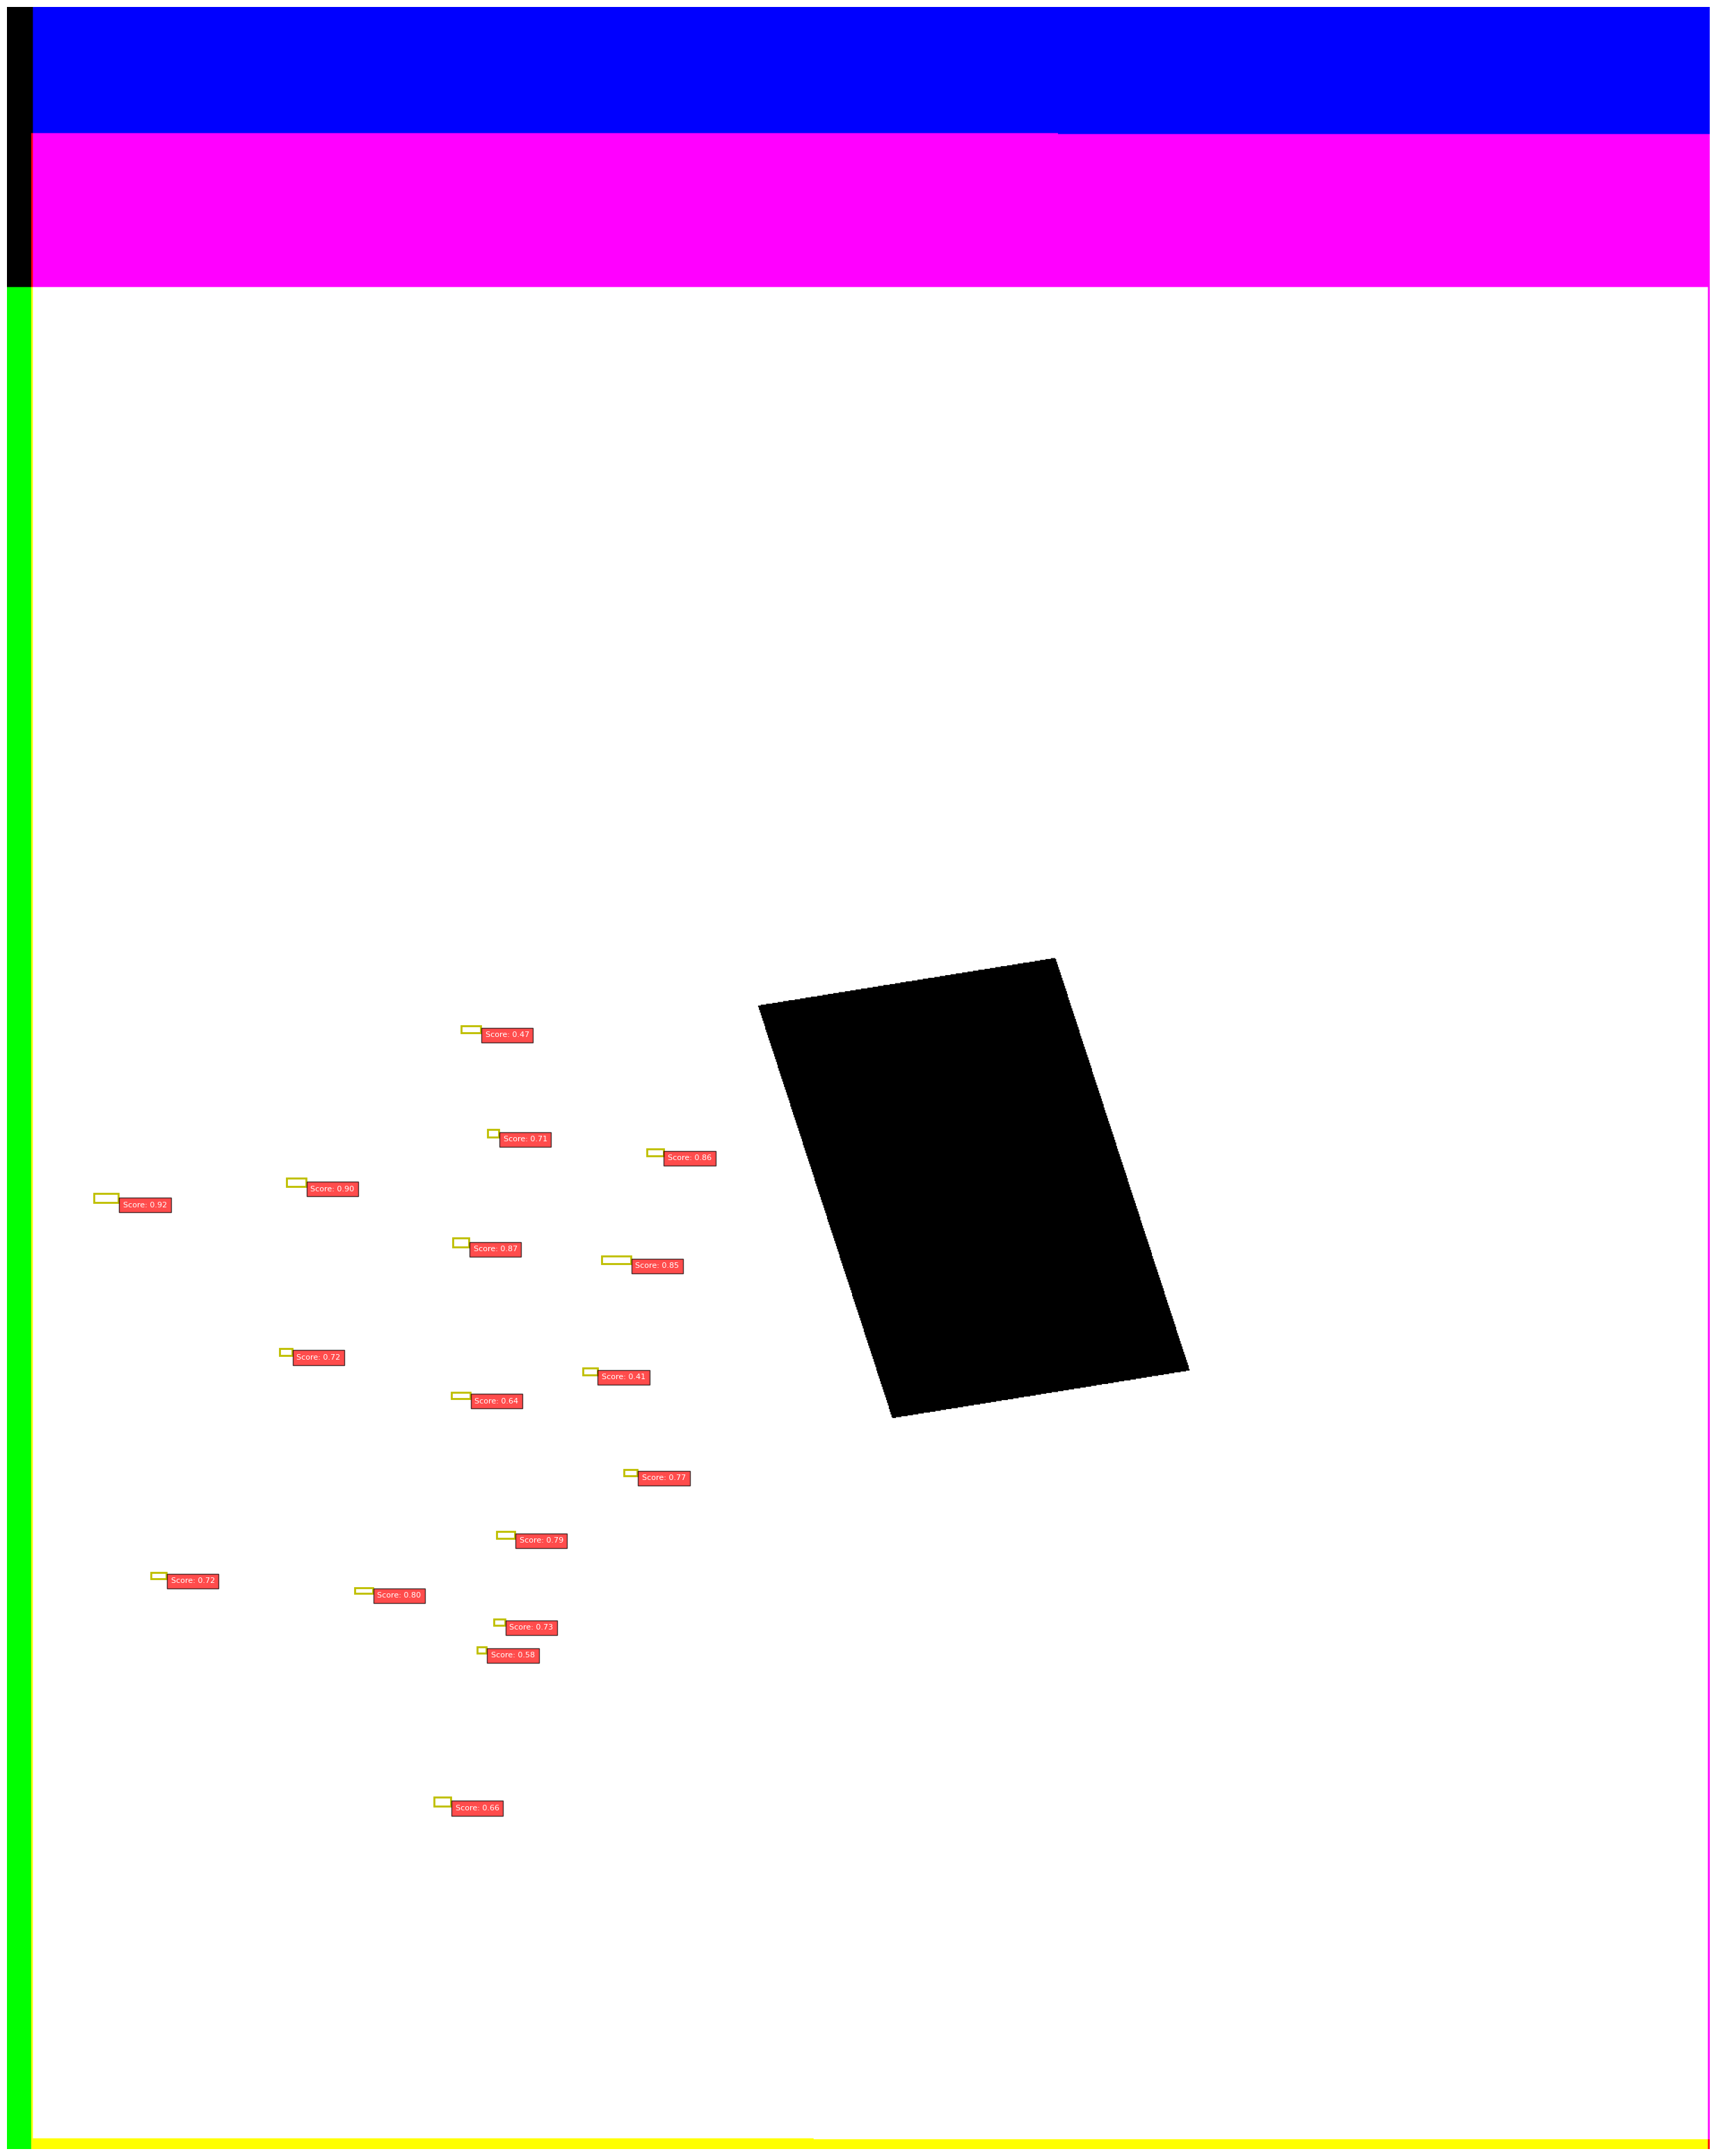

In [16]:
displayed_img = img[:,:, 3:6] / img.max()

draw_bounding_boxes(displayed_img, boxes, scores = scores, backend_args=dict(figsize=(40, 40), dpi=100), savepath=savepath, score_threshold=0.2, gt_boxes=gt_boxes)
